## Basic 1-magnitude example

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1. Generate Synthetic Data (50 samples)
np.random.seed(42)
# Metal A (Density approx 2.7) | Metal B (Density approx 8.9)
densities = np.concatenate([
    np.random.normal(2.7, 0.5, 25), 
    np.random.normal(8.9, 0.5, 25)
]).reshape(-1, 1)

# Labels: 0 for Alumite, 1 for Heavyium
labels = np.concatenate([np.zeros(25), np.ones(25)])

# 2. Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    densities, labels, test_size=0.2, random_state=42)

# 3. Initialize and Train the Random Forest
# We use few estimators because the dataset is very small
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# 4. Predictions and Evaluation
predictions = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions) * 100}%")
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['Alumite', 'Heavyium']))

# 5. Predict a new sample
sample_density = [[7.5]]
prediction = model.predict(sample_density)
metal_type = "Heavyium" if prediction[0] == 1 else "Alumite"
print(f"A metal with density {sample_density[0][0]} is predicted to be: {metal_type}")

Accuracy: 100.0%

Classification Report:
              precision    recall  f1-score   support

     Alumite       1.00      1.00      1.00         3
    Heavyium       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

A metal with density 7.5 is predicted to be: Heavyium


Precision answers: Of all the samples the model claimed were Alumite, how many were actually Alumite? \
Recall answers: Of all the actual Alumite samples that existed in the test set, how many did the model successfully catch? \
The F1-Score is the harmonic mean of Precision and Recall
$$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
Support:This is simply the count of actual occurrences of each class in your test set. In your case, since the test size was 20% of 50, your total support should be 10. It tells you how many samples were used to calculate the scores above.

Accuracy $\frac{\text{Correct Predictions}}{\text{Total Predictions}}$ \
Macro Avg: It takes the metric (like Precision) for Alumite and the metric for Heavyium, adds them together, and divides by 2. \
It’s great for spotting if the model is failing on a minority class

<Figure size 200x100 with 0 Axes>

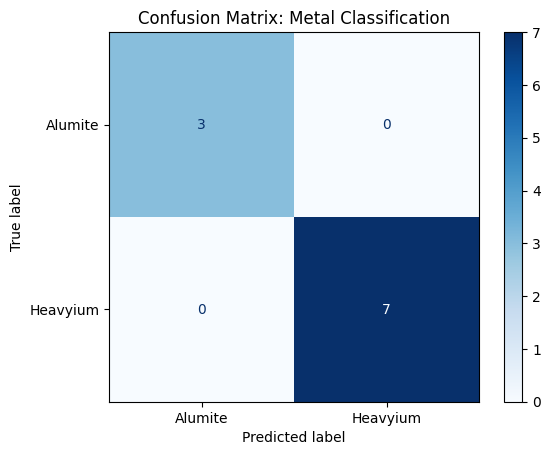

In [10]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Considers Heavyium as positive. !!
# 1. Generate the confusion matrix data
# y_test = actual labels, predictions = what the model guessed
cm = confusion_matrix(y_test, predictions)

# 2. Create the visual display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Alumite', 'Heavyium'])

# 3. Plotting
plt.figure(figsize=(2, 1))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Metal Classification')
plt.savefig('confusion_matrix.png')

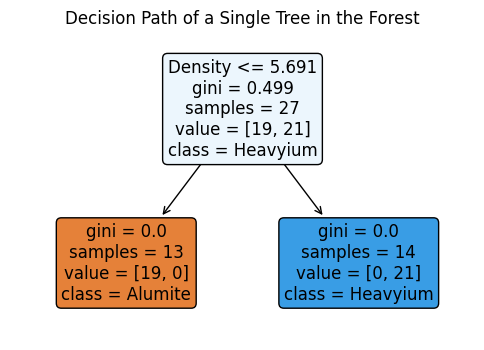

In [7]:
from sklearn import tree

# Pick the first tree from the forest
single_tree = model.estimators_[0]

plt.figure(figsize=(6, 4))
tree.plot_tree(single_tree, 
               feature_names=['Density'], 
               class_names=['Alumite', 'Heavyium'], 
               filled=True, 
               rounded=True, 
               fontsize=12)

plt.title("Decision Path of a Single Tree in the Forest")
plt.show()

For the threshold value it uses the Gini Impurity formula:$$Gini = 1 - \sum_{i=1}^{c} (p_i)^2$$Where $p_i$ is the probability (proportion) of each metal type in that specific group.\
Gini = 0.0: Perfect purity (all samples are one type of metal).Gini = 0.5: Maximum messiness (50/50 mix of both metals).

The Calculation Steps \
Sorting:The model sorts your 50 samples by density from lowest to highest.\
Midpoint Testing: It calculates midpoints between every adjacent pair of samples. For example, if you have a sample at $5.68$ and another at $5.70$, it tests $5.69$.\
Impurity Score: It calculates the Gini Impurity for the "Left" side and the "Right" side of that $5.69$ cut.\
Weighted Average: It computes a weighted average of those two scores.\
Selection: The value 5.691 was chosen because it resulted in the lowest overall impurity—meaning it created the "cleanest" separation between Alumite and Heavyium.

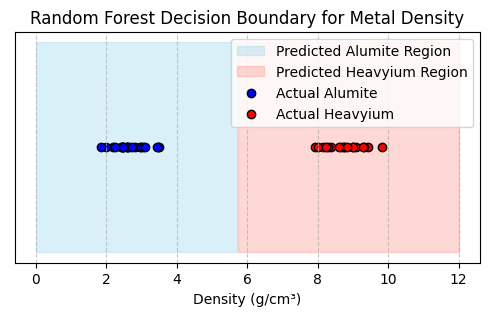

In [11]:
import matplotlib.pyplot as plt

# Create a range of density values to test (from 0 to 12)
x_range = np.linspace(0, 12, 500).reshape(-1, 1)
y_range_pred = model.predict(x_range)

plt.figure(figsize=(6, 3))

# Plot the decision boundary (background color)
plt.fill_between(x_range.flatten(), 0, 1, where=(y_range_pred == 0), # x_range.flatten(), to make sure data is a list
                 color='skyblue', alpha=0.3, label='Predicted Alumite Region')
plt.fill_between(x_range.flatten(), 0, 1, where=(y_range_pred == 1), 
                 color='salmon', alpha=0.3, label='Predicted Heavyium Region')

# Plot the actual training samples
plt.scatter(X_train[y_train == 0], [0.5] * len(X_train[y_train == 0]), 
            color='blue', label='Actual Alumite', edgecolor='k')
plt.scatter(X_train[y_train == 1], [0.5] * len(X_train[y_train == 1]), 
            color='red', label='Actual Heavyium', edgecolor='k')

plt.title('Random Forest Decision Boundary for Metal Density')
plt.xlabel('Density (g/cm³)')
plt.yticks([]) # Hide y-axis as it's just 1D data
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Mining 6-magnitude example

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Reuse your realistic data generation logic
n_samples = 1000
np.random.seed(42)
factor1 = np.random.normal(0, 1, n_samples) # Mineralization
factor2 = np.random.normal(0, 1, n_samples) # Conductivity
factor3 = np.random.normal(0, 1, n_samples) # Porosity

density = 2.7 + 0.15 * factor1 - 0.2 * factor3 + 0.05 * np.random.randn(n_samples)
gamma_ray = 40 + 20 * factor1 + 5.0 * np.random.randn(n_samples)
resistivity = np.exp(4 - 0.8 * factor2 + 0.2 * np.random.randn(n_samples))
porosity = 0.1 + 0.08 * factor3 + 0.01 * np.random.randn(n_samples)
sonic_time = 200 + 150 * factor3 + 10.0 * np.random.randn(n_samples)
mag_suscept = 1.5 + 1.0 * factor1 + 0.3 * np.random.randn(n_samples)

# Create the Feature Matrix
X = np.column_stack([density, gamma_ray, resistivity, porosity, sonic_time, mag_suscept])
features = ['Density', 'Gamma', 'Resistivity', 'Porosity', 'Sonic', 'MagSus']

# 2. CREATE THE TARGET (The "Label")
# Define Ore: High factor1 (mineralized) AND low resistivity
# This creates a non-linear rule that Random Forest is great at finding
is_ore = (factor1 > 0.8) & (resistivity < 40)
y = is_ore.astype(int) # 1 for Ore, 0 for Waste

# 3. Split data (Training and Testing)
# In Data Science, we train on one set and check accuracy on another
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Initialize the Forest with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# 4. Feature Importance !! used for Feature Ranking
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Ranking for Ore Detection:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {features[indices[f]]}: {importances[indices[f]]:.4f}")

# 5. Accuracy Metrics
print("\nModel Performance:")
print(classification_report(y_test, y_pred))

Feature Ranking for Ore Detection:
1. Resistivity: 0.3692
2. Gamma: 0.2732
3. MagSus: 0.1871
4. Density: 0.0750
5. Porosity: 0.0520
6. Sonic: 0.0435

Model Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       280
           1       0.86      0.90      0.88        20

    accuracy                           0.98       300
   macro avg       0.92      0.94      0.93       300
weighted avg       0.98      0.98      0.98       300



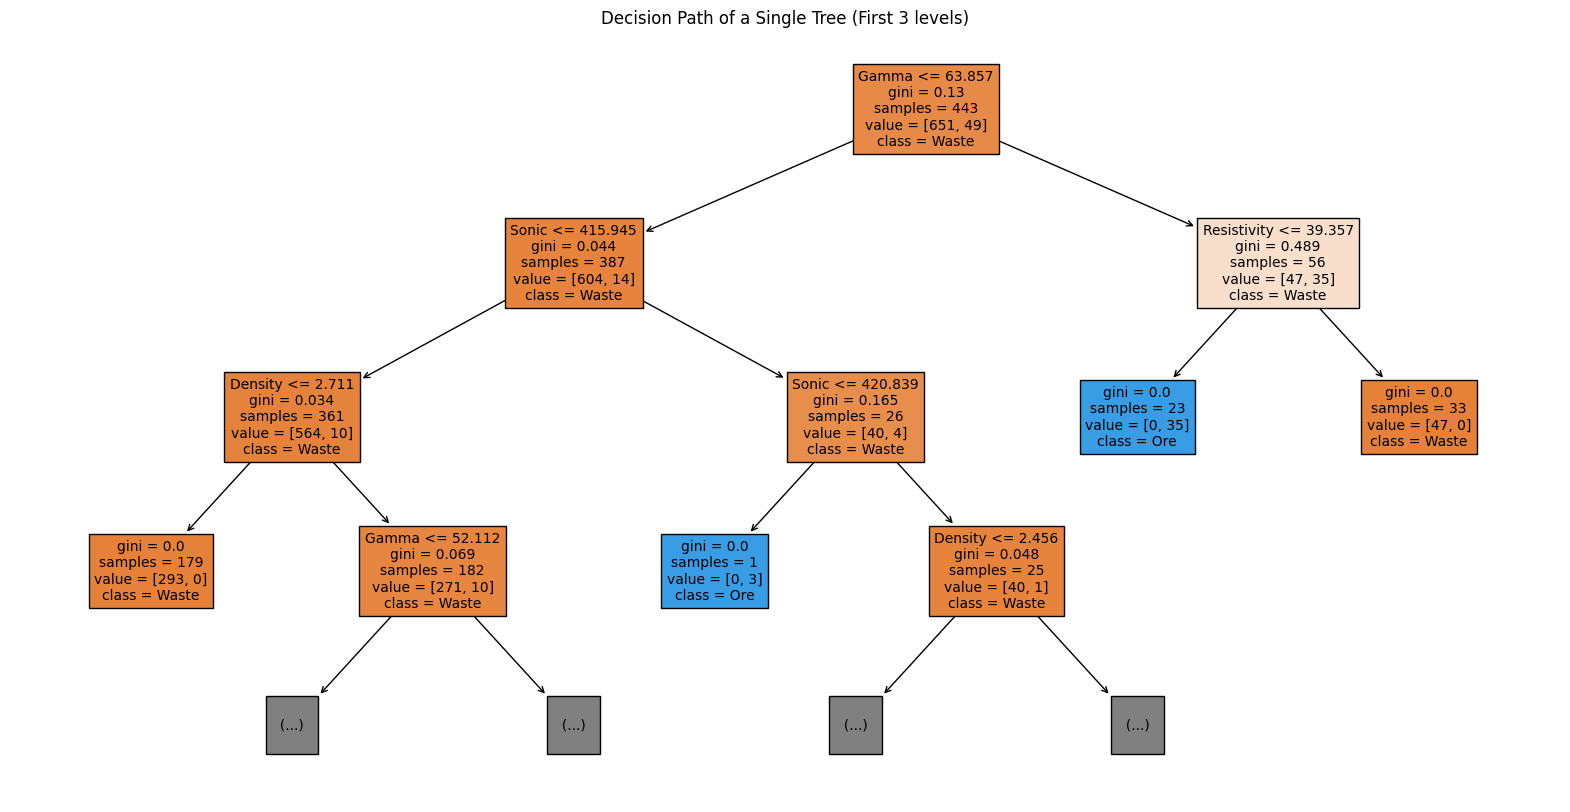

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select the first tree from the forest
tree_to_plot = rf_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, 
          feature_names=features, 
          class_names=['Waste', 'Ore'], 
          filled=True, 
          max_depth=3, # Limit depth so we can actually read it
          fontsize=10)
plt.title("Decision Path of a Single Tree (First 3 levels)")
plt.show()
# Value =[651, 49]: It is the "count" of how many samples from each category have reached that point in the logic.

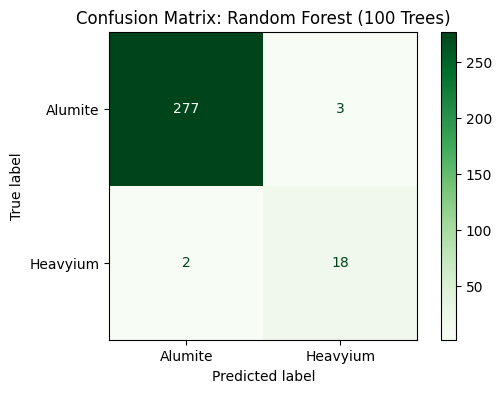

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Plot the matrix
# Note: 'features' or a custom list can be used for display_labels
fig, ax = plt.subplots(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Alumite', 'Heavyium'])

# Customize the look with a color map (e.g., Greens or Blues)
disp.plot(cmap='Greens', ax=ax)

plt.title('Confusion Matrix: Random Forest (100 Trees)')
plt.show()

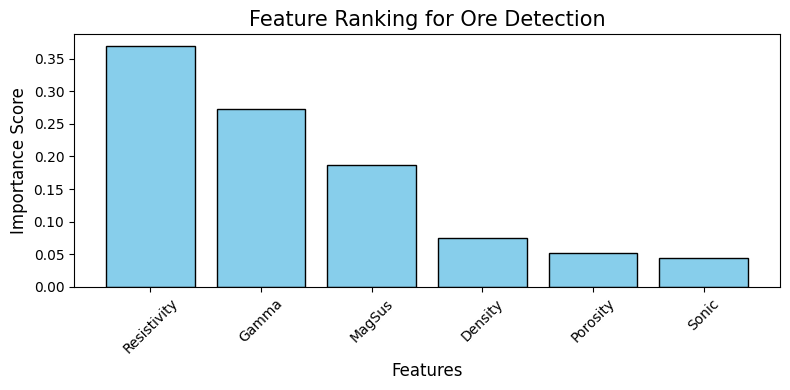

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have 'importances', 'indices', and 'features' 
# from your previous rf_model code block

plt.figure(figsize=(8, 4))
plt.title("Feature Ranking for Ore Detection", fontsize=15)

# Create the bar chart
plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center", edgecolor='black')

# Add the feature names to the y-axis (or x-axis)
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)

plt.ylabel("Importance Score", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.tight_layout()
plt.show()